# EXERCISE-2

## Data Preprocessing

Importing necessary libraries for data preprocessing and exploration. 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 12})
import seaborn as sns

Import the data and store it in a dataframe

In [0]:
dataset_path = 'Heart_rate_DN.csv' 
dataset = pd.read_csv(dataset_path)


Checking the info of the dataset.

In [491]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      274 non-null    int64  
 1   Group   274 non-null    object 
 2   Gender  274 non-null    object 
 3   Smoker  229 non-null    object 
 4   Day     274 non-null    int64  
 5   Block   274 non-null    object 
 6   ACC     274 non-null    float64
 7   QI      274 non-null    float64
 8   Age     274 non-null    object 
 9   BMI     274 non-null    object 
 10  HR      274 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 23.7+ KB


* The dataset contains 11 columns including index and 275 rows.

Check the columns.

In [551]:
# Interchanged the columns as shown below
print(dataset.columns.tolist())

['ID', 'Group', 'Gender', 'Smoker', 'Day', 'Block', 'ACC', 'QI', 'Age', 'BMI', 'HR']


Check first few rows.

In [494]:
dataset.head()

,ID,Group,Gender,Smoker,Day,Block,ACC,QI,Age,BMI,HR
0,2,Control,Female,No,0,Day,9.27,0.90,40-45,18-21,57
1,2,Control,Female,No,1,Night,9.52,0.93,40-45,18-21,49
2,2,Control,Female,No,1,Day,9.19,0.91,40-45,18-21,59
3,4,Control,Male,No,0,Day,10.07,0.98,30-35,24-27,76
4,4,Control,Male,No,1,Night,9.88,0.99,30-35,24-27,68


Check the type of each column in the dataset

In [495]:
dataset.dtypes

ID          int64
Group      object
Gender     object
Smoker     object
Day         int64
Block      object
ACC       float64
QI        float64
Age        object
BMI        object
HR          int64
dtype: object





Describe the numerical features of the dataset.

In [496]:
dataset.describe()


,ID,Day,ACC,QI,HR
count,274.000000,274.000000,274.000000,274.000000,274.000000
mean,161.412409,1.784672,9.352482,0.925876,69.412409
std,113.422004,1.126269,0.337429,0.146641,14.034807
min,2.000000,0.000000,8.500000,0.010000,40.000000
25%,69.000000,1.000000,9.130000,0.930000,60.000000
50%,136.000000,2.000000,9.350000,0.950000,68.000000
75%,257.000000,3.000000,9.560000,0.970000,78.000000
max,396.000000,5.000000,10.070000,0.990000,119.000000


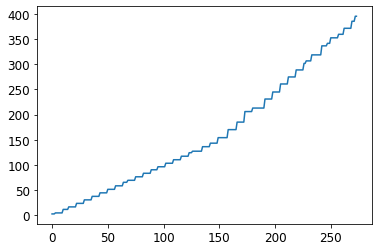

In [498]:
# Plotting the dataset
dataset.ID.plot()


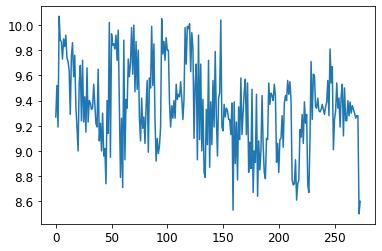

In [499]:
dataset.ACC.plot()


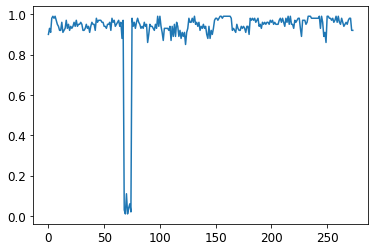

In [500]:
dataset.QI.plot()


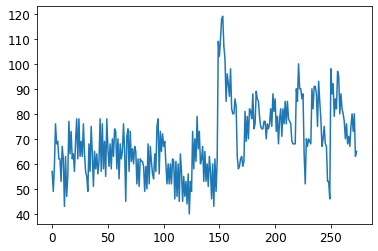

In [501]:
dataset.HR.plot()


### Data Cleaning

##### Missing values

Check the missing values

In [568]:
dataset.isna().sum()

ID         0
Group      0
Gender     0
Smoker    45
Day        0
Block      0
ACC        0
QI         0
Age        0
BMI        0
HR         0
dtype: int64

Checking the value count for each of the columns/features

In [553]:

#dataset['Group'].value_counts()
#dataset['BMI'].value_counts()
#dataset['Gender'].value_counts()
#dataset['Age'].value_counts()
dataset['Smoker'].value_counts()
#dataset['Day'].value_counts()
#dataset['Block'].value_counts()
#listings['HR'].value_counts()
#listings['ACC'].value_counts()
#listings['QI'].value_counts()

No               153
Former smoker     43
Yes               33
Name: Smoker, dtype: int64

Encoding the range of values of Age and BMI

In [569]:
dataset.BMI.replace({'18-21': 0, '21-24': 1, '24-27' : 2, '27-30' : 3, '30-33' : 4, '33-36' : 5, '36+' : 6 }, inplace=True)

dataset.head()

,ID,Group,Gender,Smoker,Day,Block,ACC,QI,Age,BMI,HR
0,2,Control,Female,No,0,Day,9.27,0.90,40-45,0,57
1,2,Control,Female,No,1,Night,9.52,0.93,40-45,0,49
2,2,Control,Female,No,1,Day,9.19,0.91,40-45,0,59
3,4,Control,Male,No,0,Day,10.07,0.98,30-35,2,76
4,4,Control,Male,No,1,Night,9.88,0.99,30-35,2,68


In [555]:
dataset.Age.replace({'20-25': 0, '25-30': 1, '30-35' : 2, '35-40' : 3, '40-45' : 4, '45-50' : 5, '50-55' : 6, '55-60' : 7, '60-65' : 8, '65+' : 9  }, inplace=True)
dataset.head()

,ID,Group,Gender,Smoker,Day,Block,ACC,QI,Age,BMI,HR
0,2,Control,Female,No,0,Day,9.27,0.90,4,0,57
1,2,Control,Female,No,1,Night,9.52,0.93,4,0,49
2,2,Control,Female,No,1,Day,9.19,0.91,4,0,59
3,4,Control,Male,No,0,Day,10.07,0.98,2,2,76
4,4,Control,Male,No,1,Night,9.88,0.99,2,2,68


Encoding all the categorical variables

In [556]:
# For checking the relationship amoung the  features , encoding its values with 0 and 1 
dataset.Group.replace({'Control': 0, 'Patient': 1}, inplace=True)
dataset.head()

,ID,Group,Gender,Smoker,Day,Block,ACC,QI,Age,BMI,HR
0,2,0,Female,No,0,Day,9.27,0.90,4,0,57
1,2,0,Female,No,1,Night,9.52,0.93,4,0,49
2,2,0,Female,No,1,Day,9.19,0.91,4,0,59
3,4,0,Male,No,0,Day,10.07,0.98,2,2,76
4,4,0,Male,No,1,Night,9.88,0.99,2,2,68


In [557]:
dataset.Gender.replace({'Female': 0, 'Male': 1}, inplace=True)
dataset.head()

,ID,Group,Gender,Smoker,Day,Block,ACC,QI,Age,BMI,HR
0,2,0,0,No,0,Day,9.27,0.90,4,0,57
1,2,0,0,No,1,Night,9.52,0.93,4,0,49
2,2,0,0,No,1,Day,9.19,0.91,4,0,59
3,4,0,1,No,0,Day,10.07,0.98,2,2,76
4,4,0,1,No,1,Night,9.88,0.99,2,2,68


In [558]:
dataset.Block.replace({'Day': 0, 'Night': 1}, inplace=True)
dataset.head()

,ID,Group,Gender,Smoker,Day,Block,ACC,QI,Age,BMI,HR
0,2,0,0,No,0,0,9.27,0.90,4,0,57
1,2,0,0,No,1,1,9.52,0.93,4,0,49
2,2,0,0,No,1,0,9.19,0.91,4,0,59
3,4,0,1,No,0,0,10.07,0.98,2,2,76
4,4,0,1,No,1,1,9.88,0.99,2,2,68


In [559]:
dataset.Smoker.replace({'No': 0, 'Former smoker': 1,'Yes': 2}, inplace=True)
dataset.head()

,ID,Group,Gender,Smoker,Day,Block,ACC,QI,Age,BMI,HR
0,2,0,0,0.0,0,0,9.27,0.90,4,0,57
1,2,0,0,0.0,1,1,9.52,0.93,4,0,49
2,2,0,0,0.0,1,0,9.19,0.91,4,0,59
3,4,0,1,0.0,0,0,10.07,0.98,2,2,76
4,4,0,1,0.0,1,1,9.88,0.99,2,2,68


Missing values (NaN) can be replaced with mean of its feature values or 0. Interploation of values can also be used to replace the missing values which takes the best value suitable. 

In [510]:
#Dataset with the missing value / Nan
dataset

,ID,Group,Gender,Smoker,Day,Block,ACC,QI,Age,BMI,HR
0,2,0,0,0.0,0,0,9.27,0.90,4,0,57
1,2,0,0,0.0,1,1,9.52,0.93,4,0,49
2,2,0,0,0.0,1,0,9.19,0.91,4,0,59
3,4,0,1,0.0,0,0,10.07,0.98,2,2,76
4,4,0,1,0.0,1,1,9.88,0.99,2,2,68
5,4,0,1,0.0,1,0,9.87,0.98,2,2,69
6,4,0,1,0.0,2,1,9.73,0.99,2,2,62
7,4,0,1,0.0,2,0,9.89,0.97,2,2,62
8,4,0,1,0.0,3,1,9.83,0.95,2,2,53
9,4,0,1,0.0,3,0,9.92,0.94,2,2,67


In [511]:
#Replacing all the missing values with the mean

DF=pd.DataFrame(dataset)
DF.fillna(DF.mean(), inplace=True)
DF
#DF.fillna(0, inplace=True)
#DF.interpolate()


,ID,Group,Gender,Smoker,Day,Block,ACC,QI,Age,BMI,HR
0,2,0,0,0.000000,0,0,9.27,0.90,4,0,57
1,2,0,0,0.000000,1,1,9.52,0.93,4,0,49
2,2,0,0,0.000000,1,0,9.19,0.91,4,0,59
3,4,0,1,0.000000,0,0,10.07,0.98,2,2,76
4,4,0,1,0.000000,1,1,9.88,0.99,2,2,68
5,4,0,1,0.000000,1,0,9.87,0.98,2,2,69
6,4,0,1,0.000000,2,1,9.73,0.99,2,2,62
7,4,0,1,0.000000,2,0,9.89,0.97,2,2,62
8,4,0,1,0.000000,3,1,9.83,0.95,2,2,53
9,4,0,1,0.000000,3,0,9.92,0.94,2,2,67


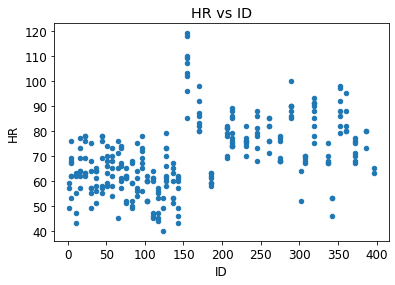

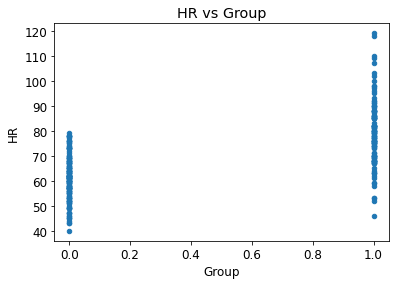

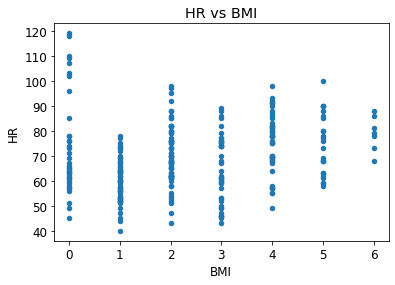

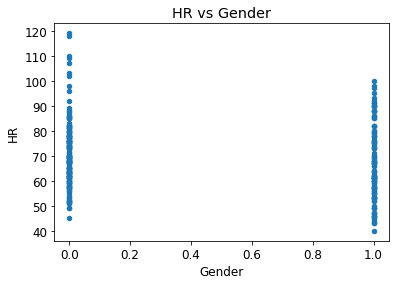

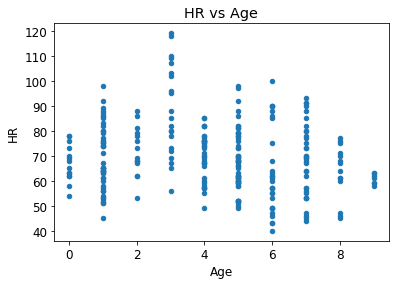

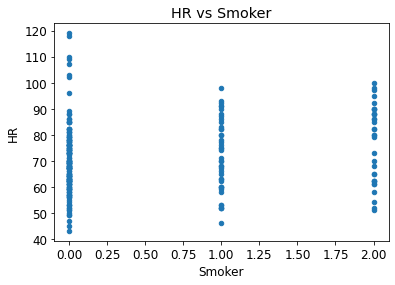

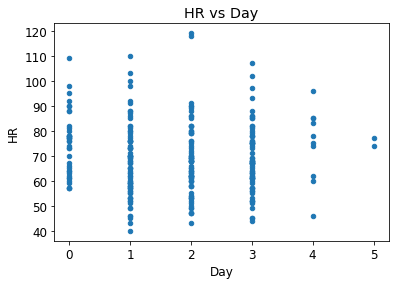

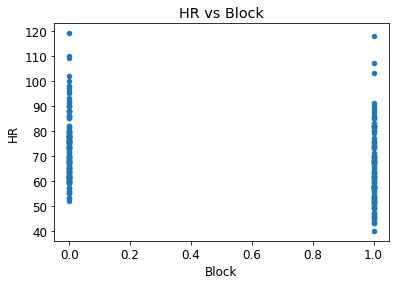

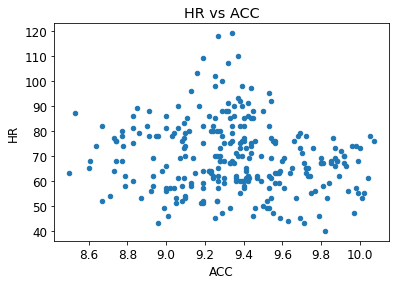

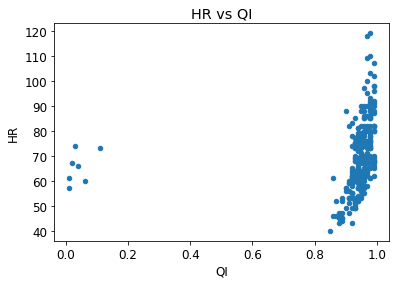

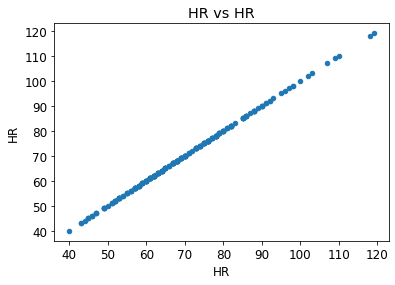

In [513]:
#Plotting all the features VS HR 
for column in features:
    dataset.sort_values(by=[column]).plot.scatter(x=column, y='HR', title='HR vs {}'.format(column))

Checking for relationship of each of the features with HR

Group

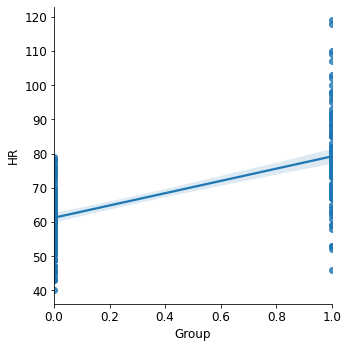

In [516]:
sns.lmplot(x="Group",y="HR",data=dataset)


Gender

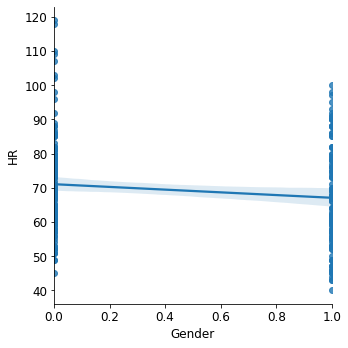

In [517]:
sns.lmplot(x="Gender",y="HR",data=dataset)


Smoker

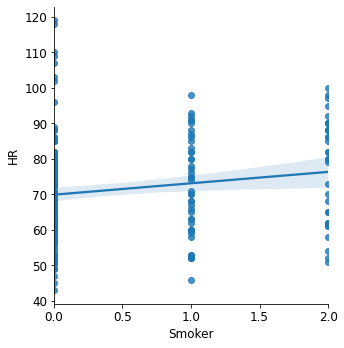

In [518]:
sns.lmplot(x="Smoker",y="HR",data=dataset)

Day

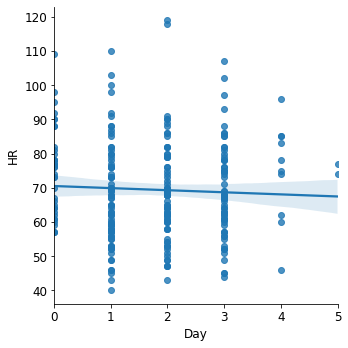

In [519]:
sns.lmplot(x="Day",y="HR",data=dataset)

Block

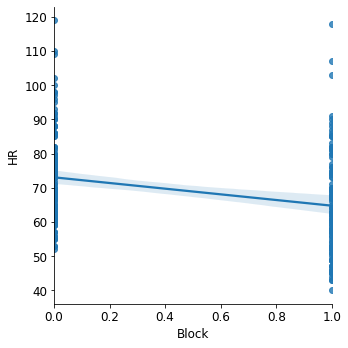

In [520]:
sns.lmplot(x="Block",y="HR",data=dataset)

ACC

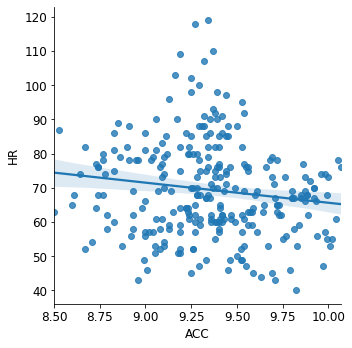

In [521]:
sns.lmplot(x="ACC",y="HR",data=dataset)

QI

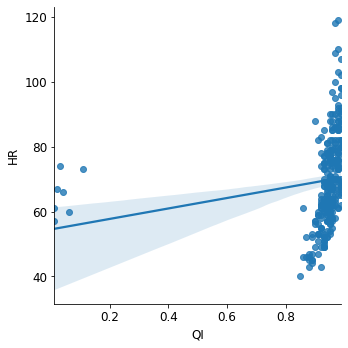

In [522]:
sns.lmplot(x="QI",y="HR",data=dataset)

Age

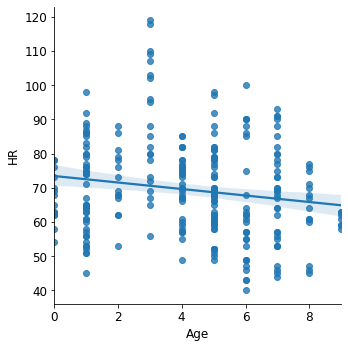

In [523]:
sns.lmplot(x="Age",y="HR",data=dataset)

BMI

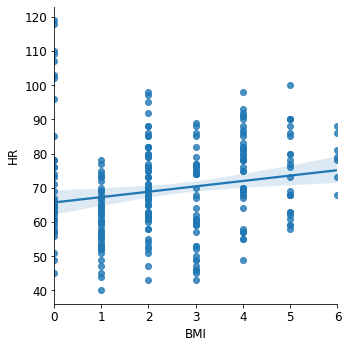

In [524]:
sns.lmplot(x="BMI",y="HR",data=dataset)

Using RandomForest algorithm to find important features.The algorithm randomly generates thousands of decision trees and takes turns leaving out each variable in fitting the model.

This helps in calculating better performance of a model or worst performance when a variable is left out.

In [525]:

# Import `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

# Taking first 7 columns and isolating last 3 columns
X = DF.iloc[:,0:7]
Y = DF.iloc[:,-3]
names = DF.columns.values

# Build the model
rfc = RandomForestClassifier()

# Fit the model

rfc.fit(X, Y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), names), reverse=True))
importance = rfc.feature_importances_
sorted_importances = np.argsort(importance)
print('sorted importance by column number of the dataset is as shown below:')
print(sorted_importances)


Features sorted by their score:
[(0.4128, 'ID'), (0.247, 'ACC'), (0.1402, 'Smoker'), (0.0701, 'Gender'), (0.0628, 'Day'), (0.0403, 'Group'), (0.0268, 'Block')]
sorted importance by column number of the dataset is as shown below:
[5 1 4 2 3 6 0]


Plotting Heatmap to check the correlations between the features

In [0]:
cat_features = ['Group','BMI','Gender','Age','Smoker','Day','Block','ACC','QI','HR']


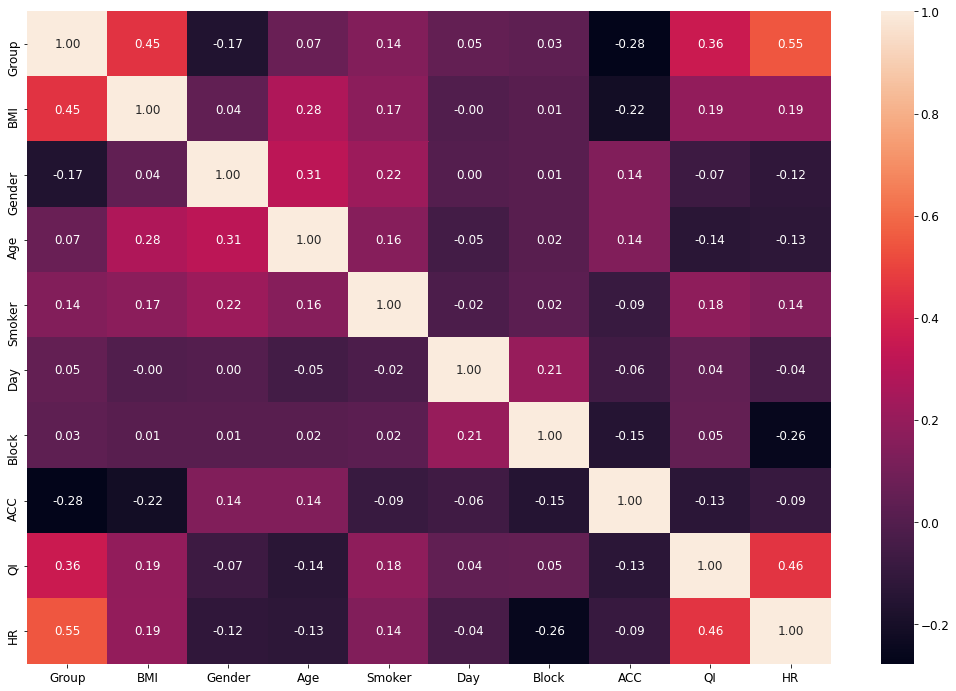

In [527]:
# plot heatmap
corr = dataset[cat_features].corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True, fmt=".2f")


In [528]:
#checking data correaltion of all the features with HR
corr = dataset.corr()
print(corr['HR'].sort_values(ascending=False))

HR        1.000000
Group     0.637827
ID        0.446877
BMI       0.180397
Smoker    0.171743
QI        0.168471
Day      -0.049051
Gender   -0.139473
ACC      -0.141338
Age      -0.163701
Block    -0.293784
Name: HR, dtype: float64


Plotting correlation between other features 

AGE vs BMI

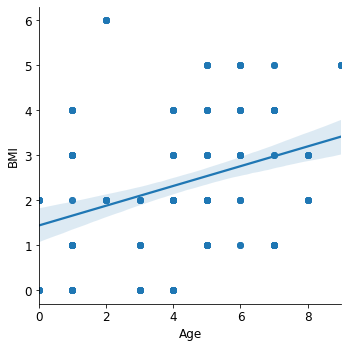

In [531]:
sns.lmplot(x="Age",y="BMI",data=dataset)


Gender vs BMI

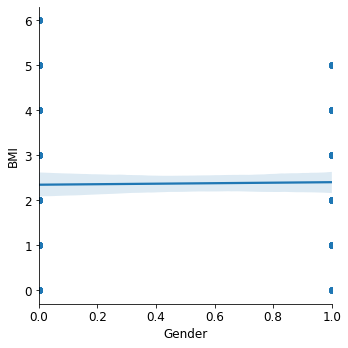

In [532]:
sns.lmplot(x="Gender",y="BMI",data=dataset)

Gender vs ACC

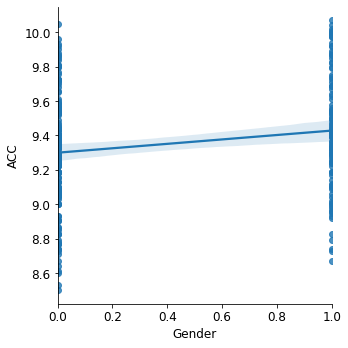

In [533]:
sns.lmplot(x="Gender",y="ACC",data=dataset)

BMI vs ACC

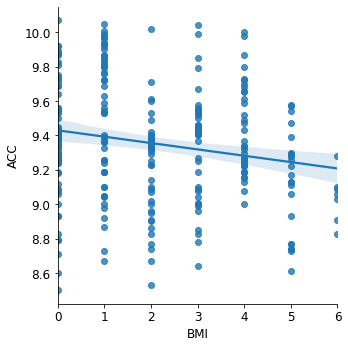

In [430]:
sns.lmplot(x="BMI",y="ACC",data=dataset)

Correlations of other features could also be found in the above method


Plotting Feature distributions

In [0]:
features = ['ID','Group', 'BMI', 'Gender', 'Age', 'Smoker', 'Day',
                      'Block', 'ACC', 'QI', 'HR']

In [0]:
# Log transforming columns
for column in features:
  if dataset[column].astype == 'float64':
    dataset[column] = dataset[column].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    dataset[column] = np.log(dataset[column])


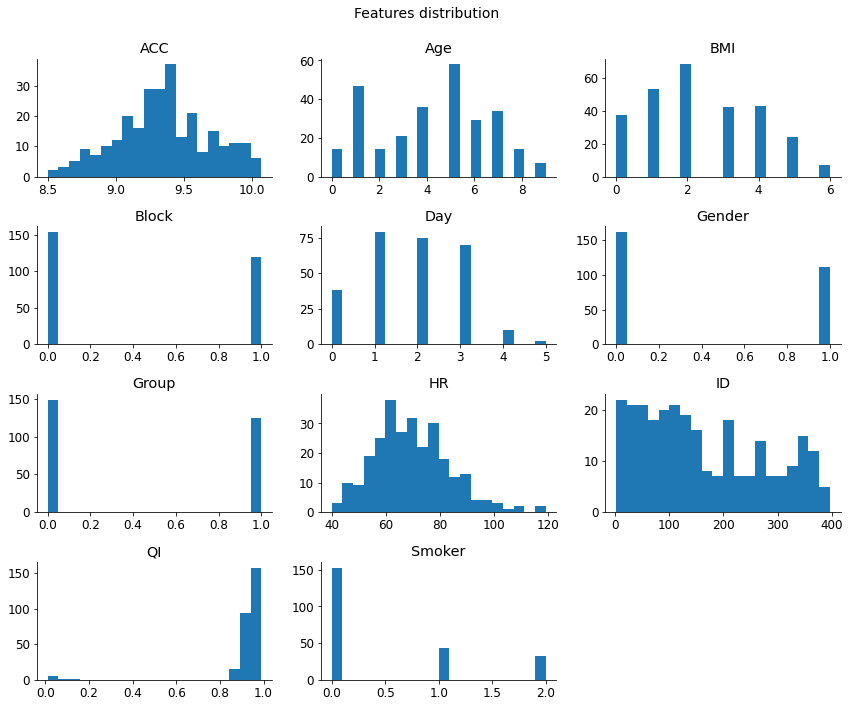

In [536]:
dataset[features].hist(figsize=(12, 10), bins=20, grid=False)
sns.despine()
plt.suptitle('Features distribution', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])


Plotting after variations of the ranges

ACC

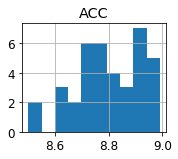

In [537]:
#checking the plot for ACC value less than 9 
dataset = dataset[dataset['ACC']<9]

columns_to_plot = ['ACC']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
    ax = fig.add_subplot(4,4,i+2)
    dataset[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show()

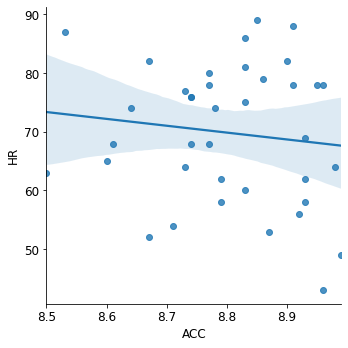

In [538]:
# Plot for ( ACC < 9) vs HR
sns.lmplot(x="ACC",y="HR",data=dataset)

Age 

For age below 50 years 


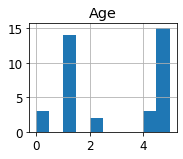

In [540]:
#dataset.Age.replace({'20-25': 0, '25-30': 1, '30-35' : 2, '35-40' : 3, '40-45' : 4, '45-50' : 5, '50-55' : 6, '55-60' : 7, '60-65' : 8, '65+' : 9  }, inplace=True)

dataset = dataset[dataset['Age'] <=5]
columns_to_plot = ['Age']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
    ax = fig.add_subplot(4,4,i+2)
    dataset[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show()


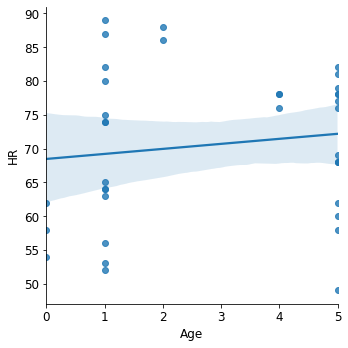

In [542]:
# Plot for ( Age < 50 years) vs HR
sns.lmplot(x="Age",y="HR",data=dataset)

For age above 50 years

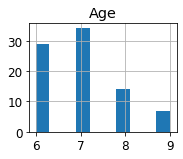

In [560]:
dataset = dataset[dataset['Age'] > 5]
columns_to_plot = ['Age']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
    ax = fig.add_subplot(4,4,i+2)
    dataset[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show()

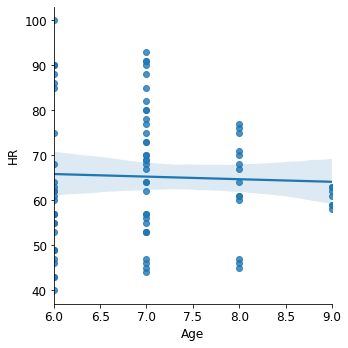

In [561]:
# Plot for ( Age > 50 years) vs HR
sns.lmplot(x="Age",y="HR",data=dataset)

BMI less than 30

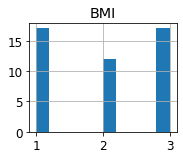

In [563]:
#dataset.BMI.replace({'18-21': 0, '21-24': 1, '24-27' : 2, '27-30' : 3, '30-33' : 4, '33-36' : 5, '36+' : 6 }, inplace=True)
dataset = dataset[dataset['BMI'] <=3]
columns_to_plot = ['BMI']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
    ax = fig.add_subplot(4,4,i+2)
    dataset[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show()

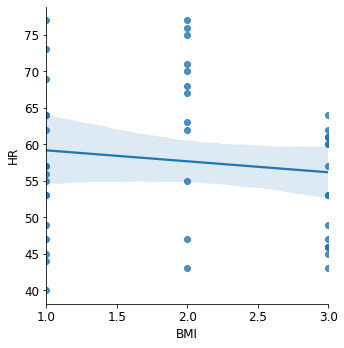

In [564]:
# Plot for ( BMI < 30 ) vs HR
sns.lmplot(x="BMI",y="HR",data=dataset)

BMI more than 30

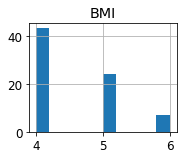

In [570]:
dataset = dataset[dataset['BMI'] >3]
columns_to_plot = ['BMI']
fig = plt.figure(figsize=(10,8))
for i, column in enumerate(columns_to_plot):
    ax = fig.add_subplot(4,4,i+2)
    dataset[column].hist(bins=10,ax=ax)
    ax.set_title(column)
fig.tight_layout()
plt.show()

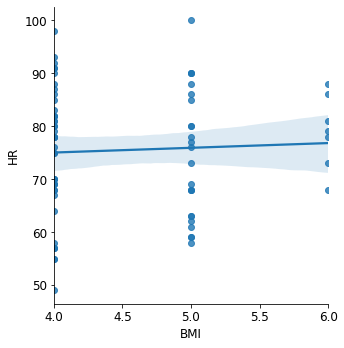

In [571]:
# Plot for ( BMI > 30 ) vs HR
sns.lmplot(x="BMI",y="HR",data=dataset)